<a href="https://colab.research.google.com/github/raiyaan555/Practicing-ML/blob/main/MLACP_Predicting_the_Anti_Cancer_Peptides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to mlacp:preparation of anti cancer precipitates

# What exactly is the mlacp:preparation of anticancer precipitates?


- In this particular dataset we are supposed to identify potential ACP candidates prior to in vitro experimentation.
- We used support vector machine and random forest-based machine-learning methods for the prediction of ACPs using the features calculated from the amino acid sequence.
- The model was trained using the Tyagi-B dataset and the machine parameters were determined by 10-fold cross-validation.
- Performance of the methods were on two benchmarking datasets, Matthews correlation coefficient and accuracy
- Random forest-based method outperformed the existing methods with an average accuracy and Matthews correlation coefficient value of 88.7% and 0.78, respectively.

## Install Conda

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-30 09:31:08--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   150MB/s    in 0.5s    

2022-10-30 09:31:09 (150 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## Download and Install Pfeature

Pfeature allows us to compute the features of amino acids crucial for quantifying the molecular properties of peptides

In [ ]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2022-10-30 09:32:24--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2022-10-30 09:32:24--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519486 (507K) [application/zip]
Saving to: ‘Pfeature.zip’

Pfeature.zip        100%[===================>] 507.31K  --.-KB/s    in 0.04s   

2022-10-30 09:32:24 (13.5 MB/s) - ‘Pfeature.zip’ saved [519486/519486]



In [ ]:
# Lets unzip the Pfeature now

! unzip Pfeature.zip

Archive:  Pfeature.zip
   creating: Pfeature/
  inflating: Pfeature/PKG-INFO       
   creating: __MACOSX/
   creating: __MACOSX/Pfeature/
  inflating: __MACOSX/Pfeature/._PKG-INFO  
  inflating: Pfeature/README         
  inflating: __MACOSX/Pfeature/._README  
  inflating: Pfeature/setup.py       
  inflating: __MACOSX/Pfeature/._setup.py  
  inflating: Pfeature/Functions_Tables.pdf  
  inflating: __MACOSX/Pfeature/._Functions_Tables.pdf  
   creating: Pfeature/build/
   creating: Pfeature/build/lib/
   creating: Pfeature/build/lib/Pfeature/
  inflating: Pfeature/build/lib/Pfeature/bonds.csv  
   creating: __MACOSX/Pfeature/build/
   creating: __MACOSX/Pfeature/build/lib/
   creating: __MACOSX/Pfeature/build/lib/Pfeature/
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._bonds.csv  
  inflating: Pfeature/build/lib/Pfeature/pfeature.py  
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._pfeature.py  
  inflating: Pfeature/build/lib/Pfeature/AAIndexNames.csv  
  inflating: __MACOSX

In [ ]:
%cd Pfeature

/content/Pfeature


## Install CD-HIT

It will filter out any redundancy in the given data.

In [ ]:
! python setup.py install

/usr/local/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
copying Pfeature/__init__.py -> build/lib/Pfeature
error: can't copy 'Pfeature/ONTAINER-LICENSE': doesn't exist or not a regular file


In [ ]:
! conda install -c bioconda cd-hit -y

Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    cd-hit-4.8.1               |       hdbcaa40_0         221 KB  bioconda
    certifi-2022.9.24          |   py37h06a4308_0         154 KB
    conda-22.9.0               |   py37h06a4308_0         878 KB
    openssl-1.1.1q             |       h7f8727e_0         2.5 MB
    toolz-0.11.2               |     pyhd3eb1b0_0          49 KB
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

  cd-hit             bioconda/linux-64::cd-hit-4.8.1-hdbcaa40_0
  toolz              pkgs/main/noarch::toolz-0.11.2-pyhd3eb1b0_0

The following

## Load Peptide Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Tyagi-B-positive.txt to Tyagi-B-positive (1).txt
Saving Tyagi-B-negative.txt to Tyagi-B-negative.txt


In [ ]:
! cat Tyagi-B-negative.txt

>non-ACP_2
AATFIFYLVQIMAQHSM
>non-ACP_5
AEQDVIGDEAAAAILGALADVEAAGFDALPPGEDVHEAIETAVVEAV
>non-ACP_6
AFEQQPRIALWNLSALAHSLSPLVQREDLEAALGK
>non-ACP_7
AFPITDTRGLYLLEYISYSFDKPKYTVEEC
>non-ACP_8
AGSLDDRERLLPYTEQCVLAIDLEAGVMRV
>non-ACP_9
AHSVNGAEQIGELVYPLIQVIVGIFKLCNAPTFLPLRLHCCQLLIQLQA
>non-ACP_10
AIAVDVLRATTTIATALAAGAEAIQV
>non-ACP_11
ARTRQSEQEIAHELLYIYYQILSLLTWTQLNHIFQQKQN
>non-ACP_12
ASDGSIASVRISPEGSPAANPAFDVTPARLITGLITERGIATPSPEGLKA
>non-ACP_13
ASLSSVTHQLSQLEKLGYLRRDPKRPRAMEVLMPLTLDGGATGR
>non-ACP_14
ATLQDMSGRIQVYVSNDLTGLDAHEAFKRWDLGDFVGVSGT
>non-ACP_15
ATVENTLFEDGDGANT
>non-ACP_16
AVAKLLATGRIESSPITDYVAAISVGVYDGLP
>non-ACP_17
AVIPITPTWGVADLNIGLLFFFAMAGLSVYAVLFAGWSSN
>non-ACP_18
AVLDQWAEQALGAAEASEEASDVLRTAVNSLLGVRLMQSWPM
>non-ACP_19
AVRHAALYQRSLFRWSLDHSLMPAIQPPLYPTFLLLILLSLIITLYVWII
>non-ACP_20
AVVLYQPPTVWSLFRSAVINLFLP
>non-ACP_21
CAAPAPRAEDL
>non-ACP_23
CQKYSIPQISTGDMLREA
>non-ACP_24
CVATRTGLGGIVGQKRSHFSWRFAVDFA
>non-ACP_25
DAIEAQALECKPKMIIAGGSAIPRQIDFKRFREIADK
>non-ACP_26
DDLEDELYAQKLKYK

In [ ]:
! cat Tyagi-B-positive.txt

>ACP_2
ACYCRIPACIAGERRYGTCIYQGRLWAFCC
>ACP_3
AIGSILGALAKGLPTLISWIKNR
>ACP_4
AIPCGESCVWIPCISTVIGCSCSNKVCYR
>ACP_5
AKWVGDLTLCRWR
>ACP_6
ALWKNMLKGIGKLAGQAALGAVKTLVGAE
>ACP_9
CAAGTACTCAGTGTGGA
>ACP_10
CAGAGTGGGAGAGGCAAGAC
>ACP_11
CCTAAGCCCTTGTGGTGTGT
>ACP_12
CIPMAWAVSWPHP
>ACP_13
CIWVSDGKKLWRH
>ACP_14
CTGAAGGTGCTGTCCCAGAT
>ACP_16
CYTQYRKCQELTA
>ACP_17
DCYCRIPACIAGERRYGTCIYQGRLWAFCC
>ACP_18
DHYNCVSSGGQCLYSACPIFTKIQGTCYRGKAKCCK
>ACP_19
DILTFEHYWAQLTS
>ACP_20
ECRRLCYKQRCVTYCRGR
>ACP_21
EVWRLAEFLAMPP
>ACP_23
FFGWLIKGAIHAGKAIHGLIHRRRH
>ACP_24
FFHHIFRGIVHVGKTIHRLVTG
>ACP_25
FFSLLPSLIGGLVSAIK
>ACP_26
FIFHIIKGLFHAGKMIHGLVTRRRH
>ACP_27
FKCRRWQWRMKKLGAPSITCVRRAF
>ACP_29
FLGALFKVASKVLPSVFCAITKKC
>ACP_30
FLIGMTQGLICLITRKC
>ACP_31
FLPAIVGAAAKFLPKIFCAISKKC
>ACP_32
FLPIIAGAAAKVVEKIFCAISKKC
>ACP_33
FLPIIAGAAAKVVQKIFCAISKKC
>ACP_34
FLPIIAGIAAKFLPKIFCTISKKC
>ACP_35
FLPIIAGVAAKVLPKIFCAISKKC
>ACP_36
FLPILASLAAKFGPKLFCLVTKKC
>ACP_37
FLPLIGRVLSGIL
>ACP_38
FLPLLAGLAANFLPTIICKISYKC
>ACP_39
FLPVIAGVAANFLPKLFCAISKK

Positive means there is anti canceral activity while negative means there is no anti canceral activity

## Remove redundant sequences using CD-HIT

In [ ]:
! cd-hit -i Tyagi-B-positive.txt  -o Tyagi-B-positive_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i Tyagi-B-positive.txt -o
         Tyagi-B-positive_cdhit.txt -c 0.99

Started: Sun Oct 30 10:09:16 2022
                            Output                              
----------------------------------------------------------------
total seq: 187
longest and shortest : 47 and 11
Total letters: 4373
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 75M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90515030

comparing sequences from          0  to        187

      187  finished        187  clusters

Approximated maximum memory consumption: 75M
writing new database
writing clustering information
program completed !

Total CPU time 0.10


In [ ]:
! cd-hit -i Tyagi-B-negative.txt  -o Tyagi-B-negative_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i Tyagi-B-negative.txt -o
         Tyagi-B-negative_cdhit.txt -c 0.99

Started: Sun Oct 30 10:10:04 2022
                            Output                              
----------------------------------------------------------------
total seq: 398
longest and shortest : 50 and 11
Total letters: 11129
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 75M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90509613

comparing sequences from          0  to        398

      398  finished        398  clusters

Approximated maximum memory consumption: 75M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


## Calculate the features using the Pfeature Library

Calculate features using the Pfeature library

---


Refer to the link - https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf


## Define functions for calculating the different features

In [ ]:
import pandas as pd


In [ ]:
# Amino acid composition (AAC)

from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

aac('Tyagi-B-positive_cdhit.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,13.33,20.00,0.00,3.33,3.33,10.00,0.00,10.00,0.00,3.33,0.00,0.00,3.33,3.33,13.33,0.00,3.33,0.00,3.33,10.00
1,13.04,0.00,0.00,0.00,0.00,13.04,0.00,17.39,8.70,17.39,0.00,4.35,4.35,0.00,4.35,8.70,4.35,0.00,4.35,0.00
2,3.45,20.69,0.00,3.45,0.00,6.90,0.00,13.79,3.45,0.00,0.00,3.45,6.90,0.00,3.45,13.79,3.45,10.34,3.45,3.45
3,7.69,7.69,7.69,0.00,0.00,7.69,0.00,0.00,7.69,15.38,0.00,0.00,0.00,0.00,15.38,0.00,7.69,7.69,15.38,0.00
4,20.69,0.00,0.00,3.45,0.00,17.24,0.00,3.45,13.79,17.24,3.45,3.45,0.00,3.45,0.00,0.00,3.45,6.90,3.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,10.00,10.00,0.00,5.00,0.00,5.00,0.00,5.00,5.00,5.00,5.00,5.00,10.00,0.00,0.00,0.00,10.00,10.00,0.00,15.00
183,20.00,0.00,6.67,6.67,0.00,0.00,0.00,26.67,6.67,6.67,0.00,13.33,0.00,0.00,0.00,0.00,6.67,0.00,0.00,6.67
184,12.50,0.00,12.50,6.25,0.00,0.00,0.00,25.00,6.25,12.50,0.00,12.50,0.00,0.00,0.00,0.00,6.25,0.00,0.00,6.25
185,7.69,7.69,0.00,0.00,7.69,0.00,7.69,0.00,7.69,0.00,0.00,0.00,7.69,0.00,7.69,7.69,15.38,0.00,0.00,23.08


In [ ]:
# Dipeptide composition (DPC)

from Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

feature = dpc('Tyagi-B-positive_cdhit.txt')
feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.00,6.90,0.00,0.00,3.45,3.45,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,3.45,0.00,0.00,0.0,0.0,0.0,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4.55,4.55,4.55,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3.57,0.00,0.00,...,0.0,0.0,0.0,0.00,3.57,0.00,0.0,0.0,0.0,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,8.33,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00
4,3.57,0.00,0.00,3.57,0.00,3.57,0.0,0.00,0.00,7.14,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.00,5.26,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,5.26
183,0.00,0.00,0.00,7.14,0.00,0.00,0.0,7.14,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00
184,0.00,0.00,6.67,0.00,0.00,0.00,0.0,6.67,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00
185,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,8.33,0.0,0.0,0.0,8.33


In [ ]:
# Physio Chemical Properties  (PCP)
from Pfeature.pfeature import pcp_wp

def pcp(input):
  a = input.rstrip('txt')
  output = a + 'pcp.csv'
  df_out = pcp_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

feature2 = pcp('Tyagi-B-positive_cdhit.txt')
feature2

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
0,0.133,0.033,0.833,0.367,0.467,0.400,0.033,0.167,0.033,0.133,...,0.100,0.167,0.433,0.500,0.500,-0.066,-0.531,0.241,0.058,-0.517
1,0.130,0.000,0.870,0.130,0.696,0.652,0.043,0.043,0.000,0.130,...,0.174,0.174,0.348,0.478,0.522,-0.659,-1.107,-0.598,-0.235,0.320
2,0.069,0.034,0.897,0.414,0.448,0.414,0.069,0.069,0.034,0.069,...,0.172,0.276,0.448,0.690,0.310,-0.065,-1.020,0.526,-0.326,-0.444
3,0.231,0.077,0.692,0.154,0.538,0.385,0.000,0.154,0.077,0.231,...,0.154,0.077,0.231,0.462,0.538,-0.206,-0.059,-0.565,0.412,-0.225
4,0.138,0.034,0.828,0.069,0.724,0.655,0.000,0.034,0.034,0.138,...,0.241,0.069,0.379,0.517,0.483,-0.282,-1.388,-0.599,-0.232,0.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.050,0.050,0.900,0.350,0.500,0.450,0.100,0.150,0.050,0.050,...,0.250,0.400,0.250,0.600,0.400,-0.649,-0.715,0.217,-0.308,-0.288
183,0.067,0.133,0.800,0.133,0.533,0.533,0.000,0.067,0.133,0.067,...,0.333,0.133,0.200,0.467,0.533,-0.362,-0.640,-0.387,-0.815,0.100
184,0.062,0.188,0.750,0.125,0.500,0.500,0.000,0.062,0.188,0.062,...,0.375,0.125,0.125,0.438,0.562,-0.373,-0.478,-0.373,-0.954,0.112
185,0.231,0.000,0.769,0.538,0.231,0.154,0.077,0.308,0.000,0.231,...,0.154,0.615,0.231,0.462,0.538,-0.019,0.419,0.129,0.344,-0.329


In [ ]:
# ATC
from Pfeature.pfeature import atc_wp

def atc(input):
  a = input.rstrip('txt')
  output = a + 'atc.csv'
  df_out = atc_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

feature3 = atc('Tyagi-B-positive_cdhit.txt')
feature3

,ATC_C,ATC_H,ATC_N,ATC_O,ATC_S
0,26.93,12.03,52.06,7.90,1.08
1,26.06,11.74,55.16,7.04,0.00
2,25.79,13.19,52.95,6.89,1.18
3,27.55,10.94,52.83,8.30,0.38
4,25.63,12.23,54.95,6.99,0.19
...,...,...,...,...,...
182,27.37,13.01,52.85,5.96,0.81
183,26.41,13.38,53.87,6.34,0.00
184,26.54,13.59,53.72,6.15,0.00
185,29.23,12.31,50.77,7.31,0.38




## Calculate feature for both positive and negative classes + combines the two classes + merge with class labels

In [ ]:
pos = 'Tyagi-B-positive_cdhit.txt'
neg = 'Tyagi-B-negative_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature = feature_calc(pos, neg, aac) # AAC
#feature = feature_calc(pos, neg, dpc) # DPC
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,13.33,20.00,0.00,3.33,3.33,10.00,0.00,10.00,0.00,3.33,...,0.00,3.33,3.33,13.33,0.00,3.33,0.00,3.33,10.00,positive
1,13.04,0.00,0.00,0.00,0.00,13.04,0.00,17.39,8.70,17.39,...,4.35,4.35,0.00,4.35,8.70,4.35,0.00,4.35,0.00,positive
2,3.45,20.69,0.00,3.45,0.00,6.90,0.00,13.79,3.45,0.00,...,3.45,6.90,0.00,3.45,13.79,3.45,10.34,3.45,3.45,positive
3,7.69,7.69,7.69,0.00,0.00,7.69,0.00,0.00,7.69,15.38,...,0.00,0.00,0.00,15.38,0.00,7.69,7.69,15.38,0.00,positive
4,20.69,0.00,0.00,3.45,0.00,17.24,0.00,3.45,13.79,17.24,...,3.45,0.00,3.45,0.00,0.00,3.45,6.90,3.45,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,8.70,0.00,0.00,4.35,0.00,8.70,4.35,0.00,21.74,26.09,...,0.00,0.00,0.00,4.35,0.00,4.35,8.70,4.35,4.35,negative
394,0.00,16.22,0.00,0.00,5.41,18.92,5.41,2.70,8.11,2.70,...,5.41,2.70,8.11,2.70,5.41,2.70,0.00,0.00,13.51,negative
395,0.00,16.22,0.00,0.00,5.41,18.92,5.41,2.70,10.81,0.00,...,2.70,2.70,8.11,2.70,5.41,5.41,0.00,0.00,13.51,negative
396,2.94,2.94,0.00,8.82,5.88,11.76,5.88,2.94,8.82,2.94,...,2.94,2.94,8.82,0.00,2.94,8.82,8.82,0.00,8.82,negative


## Data pre-processing

In [ ]:
# Assigns the features to X and class label to Y
X = feature.drop('class', axis=1)
y = feature['class'].copy()

In [ ]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [ ]:
X.shape

(585, 20)

In [ ]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,13.33,20.00,0.00,3.33,3.33,10.00,0.00,10.00,0.00,3.33,0.00,0.00,3.33,3.33,13.33,0.00,3.33,0.00,3.33,10.00
1,13.04,0.00,0.00,0.00,0.00,13.04,0.00,17.39,8.70,17.39,0.00,4.35,4.35,0.00,4.35,8.70,4.35,0.00,4.35,0.00
2,3.45,20.69,0.00,3.45,0.00,6.90,0.00,13.79,3.45,0.00,0.00,3.45,6.90,0.00,3.45,13.79,3.45,10.34,3.45,3.45
3,7.69,7.69,7.69,0.00,0.00,7.69,0.00,0.00,7.69,15.38,0.00,0.00,0.00,0.00,15.38,0.00,7.69,7.69,15.38,0.00
4,20.69,0.00,0.00,3.45,0.00,17.24,0.00,3.45,13.79,17.24,3.45,3.45,0.00,3.45,0.00,0.00,3.45,6.90,3.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,8.70,0.00,0.00,4.35,0.00,8.70,4.35,0.00,21.74,26.09,0.00,0.00,0.00,0.00,4.35,0.00,4.35,8.70,4.35,4.35
394,0.00,16.22,0.00,0.00,5.41,18.92,5.41,2.70,8.11,2.70,0.00,5.41,2.70,8.11,2.70,5.41,2.70,0.00,0.00,13.51
395,0.00,16.22,0.00,0.00,5.41,18.92,5.41,2.70,10.81,0.00,0.00,2.70,2.70,8.11,2.70,5.41,5.41,0.00,0.00,13.51
396,2.94,2.94,0.00,8.82,5.88,11.76,5.88,2.94,8.82,2.94,2.94,2.94,2.94,8.82,0.00,2.94,8.82,8.82,0.00,8.82


In [ ]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)





## Random Forest

In [ ]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

## Apply the model to make predictions

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

## Model performance

In [ ]:
feature['class']

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
393    negative
394    negative
395    negative
396    negative
397    negative
Name: class, Length: 585, dtype: object

In [ ]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

0.8632478632478633

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.8632478632478633

In [ ]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.6738369032337279

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[76,  4],
       [12, 25]])

In [ ]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

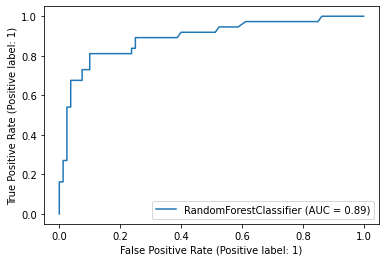

In [ ]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

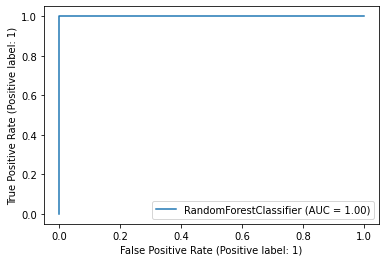

In [ ]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

## Feature importance

In [ ]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,13.33,20.00,0.00,3.33,3.33,10.00,0.00,10.00,0.00,3.33,0.00,0.00,3.33,3.33,13.33,0.00,3.33,0.00,3.33,10.00
1,13.04,0.00,0.00,0.00,0.00,13.04,0.00,17.39,8.70,17.39,0.00,4.35,4.35,0.00,4.35,8.70,4.35,0.00,4.35,0.00
2,3.45,20.69,0.00,3.45,0.00,6.90,0.00,13.79,3.45,0.00,0.00,3.45,6.90,0.00,3.45,13.79,3.45,10.34,3.45,3.45
3,7.69,7.69,7.69,0.00,0.00,7.69,0.00,0.00,7.69,15.38,0.00,0.00,0.00,0.00,15.38,0.00,7.69,7.69,15.38,0.00
4,20.69,0.00,0.00,3.45,0.00,17.24,0.00,3.45,13.79,17.24,3.45,3.45,0.00,3.45,0.00,0.00,3.45,6.90,3.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,8.70,0.00,0.00,4.35,0.00,8.70,4.35,0.00,21.74,26.09,0.00,0.00,0.00,0.00,4.35,0.00,4.35,8.70,4.35,4.35
394,0.00,16.22,0.00,0.00,5.41,18.92,5.41,2.70,8.11,2.70,0.00,5.41,2.70,8.11,2.70,5.41,2.70,0.00,0.00,13.51
395,0.00,16.22,0.00,0.00,5.41,18.92,5.41,2.70,10.81,0.00,0.00,2.70,2.70,8.11,2.70,5.41,5.41,0.00,0.00,13.51
396,2.94,2.94,0.00,8.82,5.88,11.76,5.88,2.94,8.82,2.94,2.94,2.94,2.94,8.82,0.00,2.94,8.82,8.82,0.00,8.82


In [ ]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [ ]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,AAC_A,0.041330
1,AAC_C,0.112978
2,AAC_D,0.051848
3,AAC_E,0.032232
4,AAC_F,0.073724
5,AAC_G,0.065065
6,AAC_H,0.039665
7,AAC_I,0.066413
8,AAC_K,0.050158
9,AAC_L,0.074279


Text(0.5, 0, 'Feature Importance')

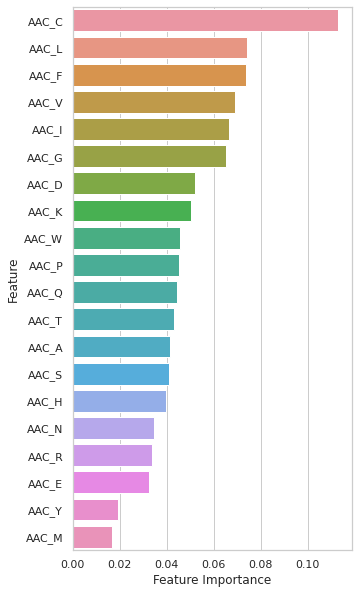

In [ ]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")